In [0]:
import os
# changing directory to Google Drive Folder (when using Google Colab)
os.chdir('/content/drive/My Drive/ANN/hw1')

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Part 1 and 2

loding and preprocessing the data

In [3]:
# loading dataset
dataset_path = "dataset/adult.data"

# using ',\s' as seprator because we have '?,' in our dataset
# converting '?' to NaN
df = pd.read_csv(dataset_path, header=None, sep=',\s', na_values=["?"])

# Define dataset headers
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "label"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [0]:
df_without_nan = DataFrameImputer().fit_transform(df)

In [0]:
# one-hot encoding

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'native-country', 'label']

df_all_nominal = pd.get_dummies(df_without_nan, columns=categorical_columns)

In [8]:
df_all_nominal.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,label_<=50K,label_>50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
# choosing x_train and y_train
x_train = df_all_nominal.loc[:,'age':'native-country_Yugoslavia'].values
y_train = df_all_nominal['label_>50K'].values

x_train_scaled = preprocessing.scale(x_train)

In [10]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (32561, 105)
y_train shape: (32561,)



# Part 3 - Model


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=x_train[0].shape),
                                    tf.keras.layers.Dense(units=1000, activation='relu'),
                                    tf.keras.layers.Dense(units=20, activation='relu'),
                                    tf.keras.layers.Dense(units=1, activation='sigmoid')

])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              106000    
_________________________________________________________________
dense_5 (Dense)              (None, 20)                20020     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 126,041
Trainable params: 126,041
Non-trainable params: 0
_________________________________________________________________


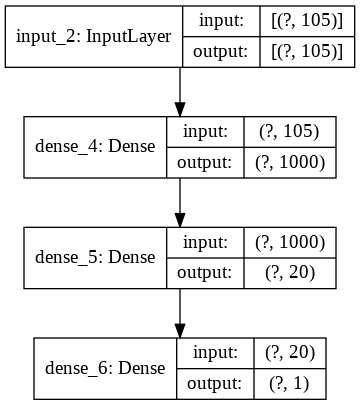

In [18]:
keras.utils.plot_model(model, show_layer_names=True, expand_nested=True, show_shapes=True)

In [0]:
# compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])#, 'precision', 'recall', 'f1_score'])

In [32]:
model.fit(x_train_scaled, y_train, epochs=20, batch_size=32 , validation_split=0.1, shuffle=True)#, callbacks=[es_callback, tb_callback])

Epoch 1/20
916/916 [==============================] - 3s 3ms/step - loss: 0.3173 - accuracy: 0.8523 - val_loss: 0.3256 - val_accuracy: 0.8554
Epoch 2/20
916/916 [==============================] - 2s 3ms/step - loss: 0.3067 - accuracy: 0.8574 - val_loss: 0.3298 - val_accuracy: 0.8474
Epoch 3/20
916/916 [==============================] - 2s 3ms/step - loss: 0.3009 - accuracy: 0.8590 - val_loss: 0.3243 - val_accuracy: 0.8505
Epoch 4/20
916/916 [==============================] - 3s 3ms/step - loss: 0.2957 - accuracy: 0.8628 - val_loss: 0.3270 - val_accuracy: 0.8474
Epoch 5/20
916/916 [==============================] - 2s 3ms/step - loss: 0.2923 - accuracy: 0.8647 - val_loss: 0.3268 - val_accuracy: 0.8539
Epoch 6/20
916/916 [==============================] - 3s 3ms/step - loss: 0.2883 - accuracy: 0.8662 - val_loss: 0.3264 - val_accuracy: 0.8520
Epoch 7/20
916/916 [==============================] - 2s 3ms/step - loss: 0.2846 - accuracy: 0.8667 - val_loss: 0.3323 - val_accuracy: 0.8489
Epoch 